# Are the attributes that people say they find important really the driving factors in the end? What factors truly influence a match? 




What does it really take to find the perfect match? In this new age of online dating, physical traits are one of the deciding factors of a right swipe. If we remove dating apps from the equation, does attractiveness really hold so much weight? Are we wasting time focusing on things that don't lead to love? Let's find out. 

Two Columbia Business School College professors named Ray Fisman and Sheena Iyengar led speed dating events from 2002-2004. During these events, participants had four minute first dates with every other participant of the opposite sex. 

Participants were asked questions regarding:

*   demographics
*   lifestyle
*   dating habits
*   if they'd like to see their date again
*   rating their date based off of attributes such as Attractiveness, Sincerity, Intelligence, Fun, Ambition, and Shared Interests
*   self perception across those attributes
*   how important each of those attributes are to them
*   belief on how much others value those attributes 




In [3]:
# importing the data

import pandas as pd

df = pd.read_csv('/content/Speed_Dating.csv', encoding = 'iso-8859-1')

df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,...,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,5,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,...,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape # checking how many rows and columns I'm working with 

(8378, 195)

In [5]:
df.isna().sum() # checking for NaN values

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64

In [6]:
# creating a new dataframe with only the columns I care about for the analysis

dating = (df.filter(['gender', 'order', 'match', 'age', 'field', 'field_cd', 'race', 'imprelig', 'from', 'goal', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'imprace'], axis = 1))

dating.head()

,gender,order,match,age,field,field_cd,race,imprelig,from,goal,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,imprace
0,0,4,0,21.0,Law,1.0,4.0,4.0,Chicago,2.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,8.0,6.0,2.0
1,0,3,0,21.0,Law,1.0,4.0,4.0,Chicago,2.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,10.0,7.0,7.0,5.0,2.0
2,0,10,1,21.0,Law,1.0,4.0,4.0,Chicago,2.0,15.0,20.0,20.0,15.0,15.0,15.0,10.0,10.0,10.0,10.0,10.0,10.0,2.0
3,0,5,1,21.0,Law,1.0,4.0,4.0,Chicago,2.0,15.0,20.0,20.0,15.0,15.0,15.0,7.0,8.0,9.0,8.0,9.0,8.0,2.0
4,0,7,1,21.0,Law,1.0,4.0,4.0,Chicago,2.0,15.0,20.0,20.0,15.0,15.0,15.0,8.0,7.0,9.0,6.0,9.0,7.0,2.0


In [7]:
dating.describe()

,gender,order,match,age,field_cd,race,imprelig,goal,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,imprace
count,8378.000000,8378.000000,8378.000000,8283.000000,8296.000000,8315.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8289.000000,8279.000000,8257.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8299.000000
mean,0.500597,8.927668,0.164717,26.358928,7.662488,2.757186,3.651645,2.122063,22.514632,17.396389,20.265613,17.457043,10.682539,11.845111,6.190411,7.175256,7.369301,6.400599,6.778409,5.474870,3.784793
std,0.500029,5.477009,0.370947,3.566763,3.758935,1.230905,2.805237,1.407181,12.587674,7.046700,6.783003,6.085239,6.124888,6.362154,1.950305,1.740575,1.550501,1.954078,1.794080,2.156163,2.845708
min,0.000000,1.000000,0.000000,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,24.000000,5.000000,2.000000,1.000000,1.000000,15.000000,15.000000,17.390000,15.000000,5.000000,9.520000,5.000000,6.000000,6.000000,5.000000,6.000000,4.000000,1.000000
50%,1.000000,8.000000,0.000000,26.000000,8.000000,2.000000,3.000000,2.000000,20.000000,18.180000,20.000000,18.000000,10.000000,10.640000,6.000000,7.000000,7.000000,7.000000,7.000000,6.000000,3.000000
75%,1.000000,13.000000,0.000000,28.000000,10.000000,4.000000,6.000000,2.000000,25.000000,20.000000,23.810000,20.000000,15.000000,16.000000,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,6.000000
max,1.000000,22.000000,1.000000,55.000000,18.000000,6.000000,10.000000,6.000000,100.000000,60.000000,50.000000,50.000000,53.000000,30.000000,10.500000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000




*   columns with a "_o" such as "amb_o", "sinc_o" are what each participant rated their date on a scale of 1 - 10 on sincerity, ambition, etc

*   columns with "1_1" such as "amb1_1", "sinc1_1" are how important that attribute (ambition, sincerity, etc) is to the participant (some were asked to rate from 0 - 10 and some were asked to distribute 100 points amongst all of the attributes)






In [8]:
# making everything lowercase in the 'field' and 'from' columns

dating['field'] = dating['field'].str.lower()
dating['from'] = dating['from'].str.lower()

## **What was everyone's goal in participating in the speed dating event?**




In [9]:
# replacing all of the numerical values with their categorical value

dating['goal'].replace(1, 'Seemed like a fun night out', inplace=True)
dating['goal'].replace(2, 'To meet new people', inplace=True)
dating['goal'].replace(3, 'To get a date', inplace=True)
dating['goal'].replace(4, 'Looking for a serious relationship', inplace=True)
dating['goal'].replace(5, 'To say I did it', inplace=True)
dating['goal'].replace(6, 'Other', inplace=True)


In [10]:
import plotly.express as px

fig = px.histogram(dating, x = "goal", color_discrete_sequence = ['#ff69b4'], title = 'Primary Goal of Participating', width=700, height=600)

fig.show()

Very few participants were actually looking for a serious relationship. Most participants just wanted to have fun and meet new people.

# What are the participants studying in school?


In [11]:
# replacing all of the numerical values with their categorical value, to make the histograms clearer/easier to read

dating2 = dating['field_cd'].replace(1, 'Law', inplace=True)
dating2 = dating['field_cd'].replace(2, 'Math', inplace=True)
dating2 = dating['field_cd'].replace(3, 'Social Science/Psychology', inplace=True)
dating2 = dating['field_cd'].replace(4, 'Medical Science/Pharma/Bio-Tech', inplace=True)
dating2 = dating['field_cd'].replace(5, 'Engineering', inplace=True)
dating2 = dating['field_cd'].replace(6, 'English/Writing/Journalism', inplace=True)
dating2 = dating['field_cd'].replace(7, 'History/Religion/Philosophy', inplace=True)
dating2 = dating['field_cd'].replace(8, 'Business/Econ/Finance', inplace=True)
dating2 = dating['field_cd'].replace(9, 'Education', inplace=True)
dating2 = dating['field_cd'].replace(10, 'Biological Sciences/Chemistry/Physics', inplace=True)
dating2 = dating['field_cd'].replace(11, 'Social Work', inplace=True)
dating2 = dating['field_cd'].replace(12, 'Undecided', inplace=True)
dating2 = dating['field_cd'].replace(13, 'Political Science/International Affairs ', inplace=True)
dating2 = dating['field_cd'].replace(14, 'Film', inplace=True)
dating2 = dating['field_cd'].replace(15, 'Fine Arts/Arts Administration', inplace=True)
dating2 = dating['field_cd'].replace(16, 'Languages', inplace=True)
dating2 = dating['field_cd'].replace(17, 'Architecture', inplace=True)
dating2 = dating['field_cd'].replace(18, 'Other', inplace=True)

In [12]:
dating['field_cd'].value_counts()  # counting frequency across column values

Business/Econ/Finance                       1925
Biological Sciences/Chemistry/Physics        993
Engineering                                  864
Political Science/International Affairs      709
Social Science/Psychology                    696
Law                                          665
Education                                    626
Social Work                                  468
English/Writing/Journalism                   325
History/Religion/Philosophy                  241
Math                                         207
Fine Arts/Arts Administration                187
Medical Science/Pharma/Bio-Tech              143
Film                                         126
Other                                         52
Languages                                     40
Undecided                                     19
Architecture                                  10
Name: field_cd, dtype: int64

In [13]:
dating['field_of_study'] = dating['field_cd'] # changing the column name 

In [14]:
# Field of Study Histogram

fig = px.histogram(dating, x = "field_of_study", color_discrete_sequence = ['#dc143c'], title = 'Field of Study')

fig.show()


The top three fields of study were Business/Finance, Science (Chemistry/Physics), and Engineering!

# How old were the participants?

In [15]:
dating['age'].value_counts().head() # counting the frequency of age values

27.0    1059
23.0     894
26.0     869
24.0     863
25.0     837
Name: age, dtype: int64

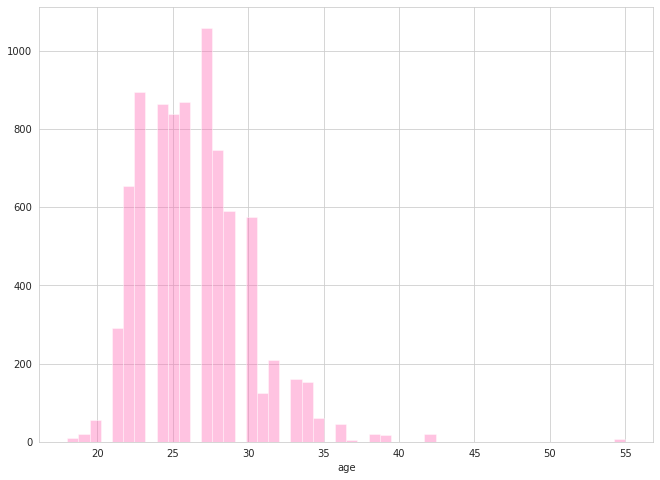

In [17]:
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 8))

# plotting the frequency distribution

sns.distplot(dating['age'], kde = False, color = 'hotpink')

Most participants were in their mid to late 20's!

# Where were the participants from?

In [ ]:
dating['from'].value_counts().head(20) # counting the fequency of each location

In [ ]:
# replacing values to fall under the right state/country category

dating['from'] = dating['from'].replace(['bronx science', 'long island, ny', 'manhattan', 'westchester, ny','ny','westchester county, n.y.', 'nyc (staten island)', 'queens', 'hastings-on-hudson, ny', 'staten island', 'great neck, ny', 'westchester, new york', 'upstate new york','nyc', 'new york city', 'rochester, ny','buffalo, ny','pougkeepsie ny', 'brooklyn', 'brooklyn, ny', 'brooklyn ny', 'long island', 'new york, ny'], 'new york') 
dating['from'] = dating['from'].replace(['nj', 'cherry hill, nj', 'northern new jersey', 'south orange, new jersey', 'born in montana, raised in south jersey (nr. philadelphia', 'born in montana, raised in south jersey (nr. philadelphia)'], 'new jersey') 
dating['from'] = dating['from'].replace(['san francisco, ca', 'san francisco(home)/los angeles(undergrad)', 'sf bay area, ca', 'san francisco bay area', 'palo alto, california', 'palo alto, ca','berkeley, ca', 'los angeles', 'california (west coast)', 'palm springs, california', 'santa barbara, california', 'los angeles, ca', 'san francisco', 'san diego', 'san diego, ca', 'southern california', 'northern california', 'torrance, ca'], 'california')
dating['from'] = dating['from'].replace(['state college, pa', 'pittsburgh, pa', 'erie, pa', 'pa', 'philadelphia, pa'], 'pennsylvania') 
dating['from'] = dating['from'].replace(['new delhi', 'new delhi, india', 'bombay, india'], 'india') 
dating['from'] = dating['from'].replace(['brandeis university', 'woburn, ma', 'boston, ma', 'cambridge, ma', 'cambridge, massachusetts', 'lexington, ma'], 'massachussetts') 
dating['from'] = dating['from'].replace(['ann arbor, mi'], 'michigan') 
dating['from'] = dating['from'].replace(['atlanta, ga', 'georgia, usa'], 'georgia') 
dating['from'] = dating['from'].replace(['clevel,', 'cincinnati, oh', 'cincinnati, ohio'], 'ohio') 
dating['from'] = dating['from'].replace(['wash dc (4 yrs)', 'dc','washington dc metro region', 'washington state', 'washington, d.c.', 'washington, dc', 'washington dc'], 'washington') 
dating['from'] = dating['from'].replace(['portland, oregon', 'portland, or'], 'oregon') 
dating['from'] = dating['from'].replace(['detroit, michigan, usa', 'detroit suburbs', 'ann arbor'], 'michigan') 
dating['from'] = dating['from'].replace(['dallas, texas', 'austin, tx'], 'texas') 
dating['from'] = dating['from'].replace(['albuquerque, nm'], 'new mexico') 
dating['from'] = dating['from'].replace(['st. louis, mo', 'kansas city, missouri'], 'missouri') 
dating['from'] = dating['from'].replace(['milwaukee, wisconsin'], 'wisconsin') 
dating['from'] = dating['from'].replace(['nashville, tn', 'memphis, tn', 'tn'], 'tennessee') 
dating['from'] = dating['from'].replace(['tuscaloosa, alabama'], 'alabama') 
dating['from'] = dating['from'].replace(['greenwich, ct'], 'connecticut') 
dating['from'] = dating['from'].replace(['maryl,', 'silver spring, md', 'md'], 'maryland') 
dating['from'] = dating['from'].replace(['burlington, vermont'], 'vermont') 
dating['from'] = dating['from'].replace(['minneapolis, mn'], 'minnessota') 
dating['from'] = dating['from'].replace(['milano, italy', 'milan - italy'], 'italy') 
dating['from'] = dating['from'].replace(['p. r. china', 'shanghai, china'], 'china') 
dating['from'] = dating['from'].replace(['bowdoin college'], 'maine') 
dating['from'] = dating['from'].replace(['nyc-6 yrs. grew up in nebraska'], 'nebraska') 
dating['from'] = dating['from'].replace(['manila, philippines'], 'phillippines') 
dating['from'] = dating['from'].replace(['bogota, colombia', 'colombia, south america'], 'colombia') 
dating['from'] = dating['from'].replace(['engl,', 'london, uk'], 'united kingdom') 
dating['from'] = dating['from'].replace(['ottawa, canada', 'toronto, canada'], 'canada') 
dating['from'] = dating['from'].replace(['sofia, bg'], 'bulgaria') 
dating['from'] = dating['from'].replace(['tokyo, japan'], 'japan') 
dating['from'] = dating['from'].replace(['/', ' / ', '  / ', '  , ', ',  '], ', ', regex = True) 
dating['from'] = dating['from'].replace(['asia, singapore'], 'singapore') 
dating['from'] = dating['from'].replace(['taipei, taiwan'], 'taiwan') 
dating['from'] = dating['from'].replace(['uncc'], 'north carolina') 
dating['from'] = dating['from'].replace(['and', '&'], ', ', regex = True) 


# replacing the value in this row because it's a zip code

dating['from'] = dating['from'].str.replace('94115', 'california')


In [ ]:
# creating a dataframe of the column 'from' so that I can plot the top 10 locations

data = pd.DataFrame(dating['from'].value_counts().head(10))

data

In [ ]:
# plotting the location counts

plt.figure(figsize=(11, 8))

pd.value_counts(dating['from']).head(10).plot.bar(color = '#dc143c', title = 'Where the Participants Were From')

A lot of the participants were from New York, California, and Jersey. There were also people from all over the world that participated, such as China, India, and Italy. 

# What do people look for in a partner? What attributes are most important to men and women?


In [ ]:
# creating a new dataframe with only the columns where the attributes were rated on how important they are to the participants

importance = (dating.filter(['attr1_1','shar1_1','intel1_1','amb1_1','sinc1_1','fun1_1']))

# plotting the means of all of the columns in the dataframe

plt.figure(figsize=(11, 8))

importance.mean().plot.bar(color = '#ff69b4')

**Attractiveness**, **intelligence**, and how **fun** their partner is, are most important to the participants.

In [ ]:
# box chart showing how much women and men care about AMBITION in a potential partner when it comes to dating  

px.box(data_frame = dating, x = 'gender', y = 'amb1_1', title = 'Importance of Ambition', width=700, height=600, color_discrete_sequence = ['#ff69b4'] ) 

I notice an outlier on the male side!

In [ ]:
dating[dating['amb1_1']>50] # finding the rows with outliers

In [ ]:
dating = dating[dating.amb1_1 != 53] # removing every row in the amb1_1 column with the value 53 so that there are no longer outliers 

In [ ]:
# reprinting the box plot now that the outlier is removed

px.box(data_frame = dating, x = 'gender', y = 'amb1_1', title = 'Importance of Ambition', width=700, height=600, color_discrete_sequence = ['#ff69b4']) 

Women seem to care a bit more about ambition than men!

In [ ]:
# box chart showing how much women and men care about ATTRACTIVENESS in a potential partner when it comes to dating  

px.box(data_frame = dating, x = 'gender', y = 'attr1_1', title = 'Importance of Attractiveness', width=700, height=600, color_discrete_sequence = ['#ff69b4']) 

On average, it seems like men care more about looks than women do!






In [ ]:
# box chart showing how much women and men care about having SHARED INTERESTS when it comes to dating 

px.box(data_frame = dating, x = 'gender', y = 'shar1_1', title = 'Importance of Having Shared Interests', width=700, height=600, color_discrete_sequence = ['#ff69b4']) 

On average, it seems like women care more about having shared interests than men!

## **How important is being the same race?**

In [ ]:
# replacing the numerical values with their categorical value

dating['race'].replace(1, 'Black/African American', inplace = True)
dating['race'].replace(2, 'European/Caucasian-American', inplace = True)
dating['race'].replace(3, 'Latino/Hispanic American', inplace = True)
dating['race'].replace(4, 'Asian/Pacific Islander/Asian-American', inplace = True)
dating['race'].replace(5, 'Native American', inplace = True)
dating['race'].replace(6, 'Other', inplace = True)


In [ ]:
# histogram displaying the races of the participants 

fig = px.histogram(dating, x = "race", color_discrete_sequence = ['#dc143c'], title = 'Participant Races', width=700, height=600)

fig.show()

Most participants were either **European/Caucasian-American** or **Asian/Pacific-Islander/Asian-American**.

In [ ]:
fig = px.histogram(dating, x = "imprace", color_discrete_sequence = ['#ff69b4'], title = 'How Important is Race from 0 - 10?', width=700, height=600)

fig.show()

For a lot of participants, it doesn't seem like race is a huge factor!

# Exploring Matches! How did people rate their dates? What does this say about what they *really* value/find important in a partner?

In [ ]:
dating['match'].value_counts() 

There were **1,379** matches out of **8,368** dates!

In [ ]:
# filtering out a new dataframe so I can plot the distribution of the rating of their dates by match (1) and no match (0)

matchesdf = (dating.filter(['amb_o','intel_o','sinc_o','fun_o','attr_o','shar_o', 'match']))

In [ ]:
import plotly.graph_objects as go

df = pd.DataFrame(data)

# convert to long

dfl = matchesdf.set_index('match').stack().reset_index().rename(columns={'level_1': 'groups', 0: 'values'})

plt.figure(figsize=(11, 8))

# plot

p = sns.boxplot(x='groups', y='values', data=dfl, hue='match', color = 'red')
plt.show()


It looks like shared interests and fun are going to be significant. There is a big difference in the mean of fun for the dates that ended up in a match vs the mean of fun for the dates that ended up without a match. Same for shared interests. For ambition the mean was the same, so it doesn't seem like ambition matters much.

In [ ]:
# creating a new dataframe filtering out columns that I want to place in a heatmap

newdf = (dating.filter(['round', 'match', 'age', 'race', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o',
                      ], axis = 1))

newdf.head()

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))

# Calculate correlations of the new dataframe
corr = newdf.corr()
 
# Heatmap
sns.heatmap(corr, )

It looks like how *attractive and fun their date is, and how much they have in common with them (shared interests)* are most highly correlated with getting a match.

Other things to note:


*  intelligence and ambition are correlated
*  attractiveness and fun are correlated
*  shared interests and fun are correlated


## Logistic Regression

In [ ]:
dating = dating.dropna()  # dropping all rows with NaN values so that the regression can run 

In [ ]:
# replacing race with their numerical values so that the regression will run 

dating['race'].replace('Black/African American', 1,  inplace = True)
dating['race'].replace('European/Caucasian-American', 2, inplace = True)
dating['race'].replace('Latino/Hispanic American', 3,  inplace = True)
dating['race'].replace('Asian/Pacific Islander/Asian-American', 4, inplace = True)
dating['race'].replace('Native American', 5, inplace = True)
dating['race'].replace('Other', 6, inplace = True)

In [ ]:
from sklearn.linear_model import LogisticRegression
from scipy import stats

# my independent variables are age, race, and what each participant rated their date among the 6 attributes

X2 = dating[['attr_o','sinc_o','intel_o','fun_o','amb_o','shar_o','age','round','race',]]
y = dating['match']

# fitting the model 

dating_log_model = LogisticRegression(solver='liblinear')
dating_log_model.fit(X2,y)
dating_log_model.score(X2,y)

The model has 82% accuracy!

In [ ]:
from sklearn.feature_selection import chi2

# getting the p-values of all of the independent variables

scores, pvalues = chi2(X2, y)

In [ ]:
p_values = {'X2':X2.columns, 'pvalues':pvalues}

# creating a new dataframe of all of the p-values to visualize them  

result = pd.DataFrame(p_values)

print(result)

Like the analysis suggested, **shared interests**, **fun**, and **attractiveness** are the most significant variables! Ambition and intelligence are the **least** significant of the 6 rated attributes. 

## Good news! If you're not someones physical type, it doesn't seem to matter as much as how much you have in common in terms of interests and how fun you are to be around!

Conclusion:

The participants found attractiveness, intelligence, and fun to be the most important attributes to them when asked (in that order), however, their decisions when it came to matching said something else. Attractiveness isn't as important as the participants considered it to be. The regression reveals that having ***shared interests*** holds more weight than both attractiveness and fun, and intelligence isn't as important as they thought it was to them!


So if you find yourself on Hinge, Bumble, or Tinder:

*   include pictures of your adventures, to show what kind of person you are to be around/ how fun you are
*   include pictures of you engaging in your hobbies (whether it's running, painting, etc.) so that people can see what you're interested in 
*   make sure to read bio's and prompts to get a glimpse into each person's 
interests and see if they align with yours... because, who knows...it could lead to a match!